What pattern do you want to search? apple


Pattern apple found 1 times in file file_303.txt:
  Occurrence at position 1403
Pattern apple found 1 times in file file_458.txt:
  Occurrence at position 757
Pattern apple found 1 times in file file_417.txt:
  Occurrence at position 3196
Pattern apple found 1 times in file file_376.txt:
  Occurrence at position 4405
Pattern apple found 1 times in file file_220.txt:
  Occurrence at position 1344
Pattern apple found 1 times in file file_126.txt:
  Occurrence at position 10292
Pattern apple found 3 times in file file_441.txt:
  Occurrence at position 38
  Occurrence at position 1645
  Occurrence at position 1704
This is the graph for the KMP analysis


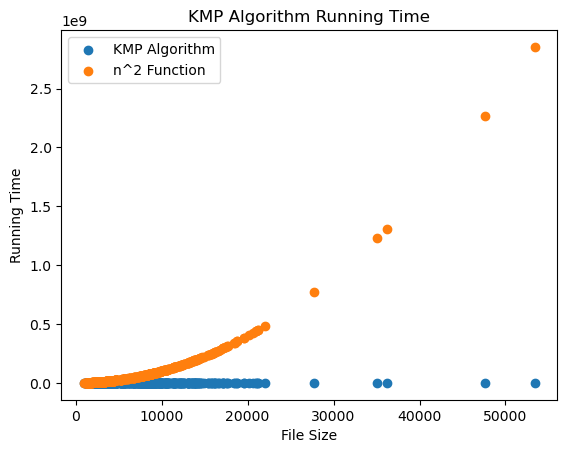

In [6]:
import os
import time
import matplotlib.pyplot as plt

def kmp(masterString, pattern):
    n = len(masterString)
    b = len(pattern)
    t = computePatternFromMaster(pattern, b)
    j = 0
    occurrences = []
    for i in range(n):
        while j > 0 and pattern[j] != masterString[i]:
            j = t[j-1]
        if pattern[j] == masterString[i]:
            j = j+1
        if j == b:
            occurrences.append(i-b+1)
            j = t[j-1]
            
    return occurrences
 
def computePatternFromMaster(pattern, b):
    t = [0]*b
    x = 0
    for i in range(1, b):
        while x > 0 and pattern[x] != pattern[i]:
            x = t[x-1]
        if pattern[x] == pattern[i]:
            x = x+1
        t[i] = x
    return t

def searchPatternKMP(location,pattern):
    for file in os.listdir(location):
        filepath = os.path.join(location, file)
        if os.path.isfile(filepath):
            with open(filepath, 'r', encoding='utf-8') as f:
                content = f.read()
                occurrences = kmp(content,pattern)
                if len(occurrences) > 0:
                    print(f"Pattern {pattern} found {len(occurrences)} times in file {file}:")
                    for occurrence in occurrences:
                        print(f"  Occurrence at position {occurrence}")

def CalcRunTime(location, pattern):
    fileSize = []
    runTime = []
    for filename in os.listdir(location):
        filePath = os.path.join(location, filename)
        if os.path.isfile(filePath):
            with open(filePath, 'r') as file:
                content = file.read()
                size = len(content)
                starttime = time.time()
                occurrences = kmp(content, pattern)
                endtime = time.time()
                running_time = endtime - starttime
                fileSize.append(size)
                runTime.append(running_time)
    return fileSize, runTime

def plot_graph(location, pattern):
    fileSize, runTime = CalcRunTime(location, pattern)
    plt.scatter(fileSize, runTime, label='KMP Algorithm')
    plt.scatter(fileSize, [t**2 for t in fileSize], label='n^2 Function')
    plt.xlabel('File Size')
    plt.ylabel('Running Time')
    plt.title('KMP Algorithm Running Time')
    plt.legend()
    plt.show()

location='./Files'
pattern=input('What pattern do you want to search?')                        
searchPatternKMP(location,pattern)
print("This is the graph for the KMP analysis")
plot_graph(location, pattern)

